# Inflow analysis

### Load profile data

In [1]:
import pathlib
from cfdmod.analysis.inflow.profile import InflowData

data_folder = pathlib.Path("./fixtures/tests/inflow/pitot_inlet")
profile = InflowData.from_files(
    hist_series_path=data_folder / "hist_series.csv", points_path=data_folder / "points.csv"
)

# Or you can manually instantiate a profile object
# data = pd.read_csv(data_folder / "hist_series.csv")
# points = pd.read_csv(data_folder / "points.csv")
# profile = InflowData(data=data, points=points)

### Mean velocity data

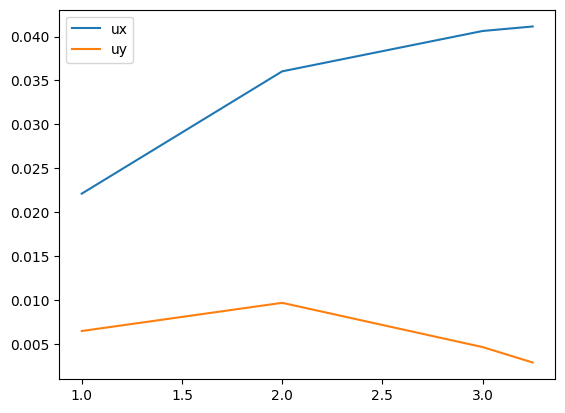

In [2]:
import matplotlib.pyplot as plt
from cfdmod.analysis.inflow.functions import calculate_mean_velocity

mean_velocity_components = ["ux", "uy"]
mean_velocity_data = calculate_mean_velocity(
    inflow_data=profile, for_components=mean_velocity_components
)

for component in mean_velocity_components:
    x = profile.points["z"]
    y = mean_velocity_data[f"{component}_mean"]
    plt.plot(x, y, label=f"{component}")

plt.legend()
plt.show()
plt.close()

### Turbulence intensity

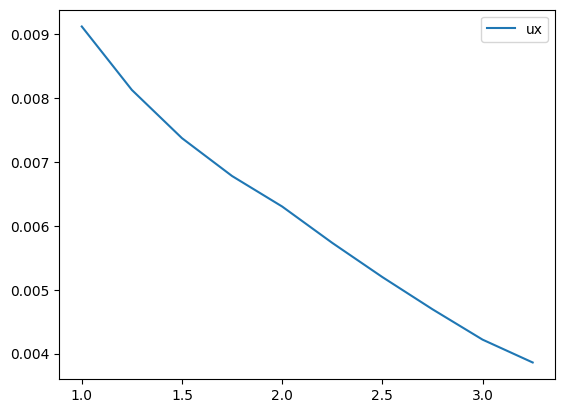

In [4]:
from cfdmod.analysis.inflow.functions import calculate_turbulence_intensity

turbulence_intersity_components = ["ux"]
turbulence_intersity_data = calculate_turbulence_intensity(
    inflow_data=profile, for_components=turbulence_intersity_components
)

for component in turbulence_intersity_components:
    x = profile.points["z"]
    y = turbulence_intersity_data[f"I_{component}"]
    plt.plot(x, y, label=f"{component}")

plt.legend()
plt.show()
plt.close()

### Spectral density

Set normalization parameters

In [5]:
from cfdmod.analysis.inflow.profile import NormalizationParameters

params = NormalizationParameters(reference_velocity=1.0, characteristic_length=1.0)
params

NormalizationParameters(reference_velocity=1.0, characteristic_length=1.0)

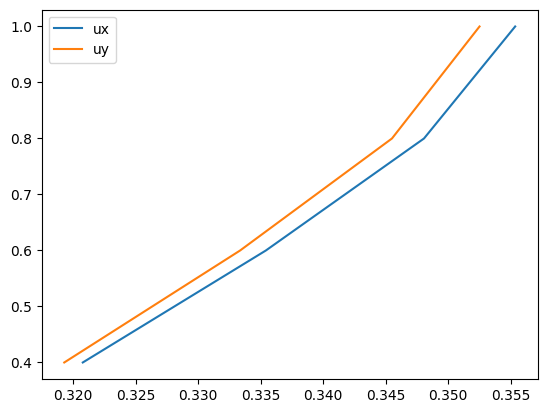

In [6]:
from cfdmod.analysis.inflow.functions import calculate_spectral_density

spectral_components = ["ux", "uy"]
spectral_data = calculate_spectral_density(
    inflow_data=profile,
    target_index=1,
    for_components=spectral_components,
    normalization_params=params,
)

for component in spectral_components:
    x = spectral_data[f"f ({component})"]
    y = spectral_data[f"S ({component})"]
    plt.plot(x, y, label=f"{component}")

plt.legend()
plt.show()
plt.close()

### Autocorrelation

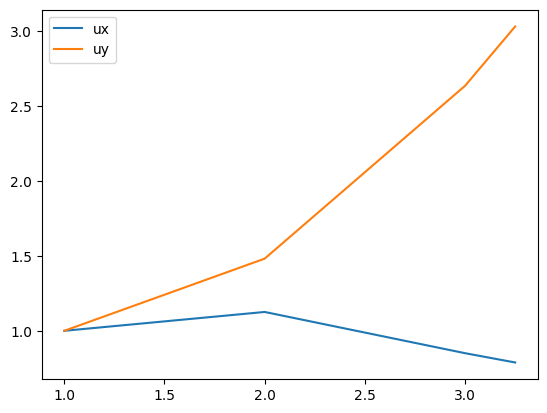

In [7]:
from cfdmod.analysis.inflow.functions import calculate_autocorrelation

autocorrelation_components = ["ux", "uy"]
autocorrelation_data = calculate_autocorrelation(
    inflow_data=profile, anchor_point_idx=0, for_components=autocorrelation_components
)

for component in autocorrelation_components:
    x = profile.points["z"]
    y = autocorrelation_data[f"coef_{component}"]
    plt.plot(x, y, label=f"{component}")

plt.legend()
plt.show()
plt.close()